# **Mall Customer Segmentation Clustering using K-Means**

*Tuesday, 26 April 2022*

**Created by Ahmad Nafiys Ismail**

# **Import Library**

In [1]:
# data manipulation
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

# modelling
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# **Data Preparation & Wrangling**

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis .

This file contains the basic information (ID, age, gender, income, spending score) about the customers.

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df # check the table

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Exploratory Data Analysis**

In [4]:
#Missing data check

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Removing duplicate rows

print('Duplicate Rows Count : ', df.duplicated().sum())

df=df.drop_duplicates(keep="first")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df["Gender"] = df["Gender"].astype('category').cat.codes
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## **Principal Component Analysis (PCA)**

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [8]:
def pca(data, n):
    
    if type(n) == int:
        
        pca = PCA(n_components = n )
        pca.fit(data)
        df_pca = pca.transform(data)
        return df_pca
        
    else:
        return data

In [9]:
df.drop('CustomerID',axis=1, inplace=True)

#Sample
df_pca = pca(df, 2)
df_pca = pd.DataFrame(df_pca, columns = ['P1','P2'])
df_pca.head()

,P1,P2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412


Text(0, 0.5, 'PCA 2')

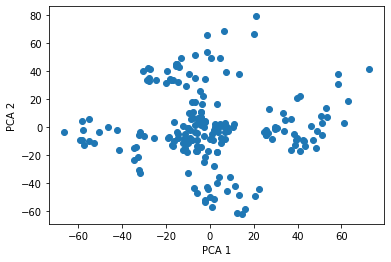

In [10]:
# View of the dataset after PCA

plt.scatter(df_pca.P1, df_pca.P2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

**Estimated number of clusters : 5**

# **Modelling**

## **K-Means Clustering**

## **The Elbow Curve**

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

In [11]:
def cluster_Wcss(data, k ):
       
    wcss = []
    
    for i in range(1, k):
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10,5))
    plt.plot(range(1,11), wcss)
    plt.title('The Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()
        

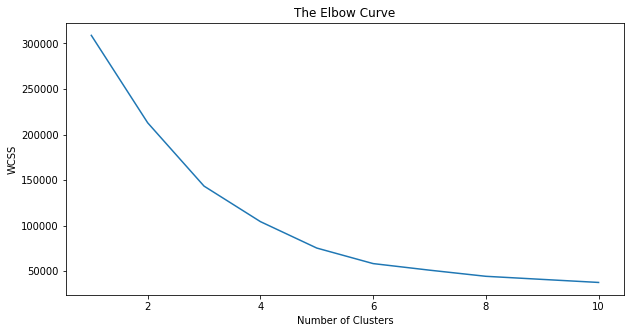

In [12]:
cluster_Wcss(df, 11)

Number of clusters possible with the elbow curve:


*   4 clusters
*   5 clusters
*   6 clusters


## **Creating The Best Scoring Model**

In [13]:
param_data = { 'n' : [2,'False'] }
param_data = [dict(zip(param_data.keys(), v)) for v in itertools.product(*param_data.values())]

param_model = { 
    'n_clusters': [3, 4, 5 , 6],
    'init' : ['k-means++'],
    'random_state' :[16]
}
param_model = [dict(zip(param_model.keys(), v)) for v in itertools.product(*param_model.values())]

In [15]:
def cluster(data, param_data, param_model):

    last =[]
    
    for dp in param_data:

        X = pca(data, dp['n'])
        X = pd.DataFrame(X) 
        for mp in param_model:

            model = KMeans(**mp)

            y_means = model.fit_predict(X)
            centers = model.cluster_centers_
            
            silhouette = silhouette_score(X, y_means)
            davies_bouldin = davies_bouldin_score(X, y_means)
            
            res = {}
            res['Model'] = 'Kmeans'
            res['Random_State'] = mp['random_state']
            
            res['Pca'] = dp['n']
            res['Params'] = mp
            res['Centers'] = centers
            res['Silhouette'] = silhouette
            res['Davies_Bouldin'] = davies_bouldin
               
            last.append(res)
            
    result = pd.DataFrame(last, columns=['Model','Pca','Params', 'Centers', 'Silhouette', 'Davies_Bouldin'])
    
    return result

In [16]:
result =  cluster(df,  param_data, param_model)
result = result.sort_values(by=['Silhouette'], ascending=False)
result.head()

,Model,Pca,Params,Centers,Silhouette,Davies_Bouldin
2,Kmeans,2,"{'n_clusters': 5, 'init': 'k-means++', 'random...","[[41.551038751053355, 1.8708754080537668], [-4...",0.552626,0.584301
3,Kmeans,2,"{'n_clusters': 6, 'init': 'k-means++', 'random...","[[54.80661771836187, 18.992161509065706], [-44...",0.534448,0.663913
1,Kmeans,2,"{'n_clusters': 4, 'init': 'k-means++', 'random...","[[-13.167019014458573, -4.623026887458498], [4...",0.499151,0.671398
7,Kmeans,False,"{'n_clusters': 6, 'init': 'k-means++', 'random...","[[0.4444444444444445, 56.155555555555544, 53.3...",0.452055,0.747522
0,Kmeans,2,"{'n_clusters': 3, 'init': 'k-means++', 'random...","[[41.551038751053355, 1.8708754080537668], [-1...",0.451053,0.731013


# **Result & Conclusion**

The parameter with the highest silhouette score was selected.

In [17]:
# Best Results

bp = result.Params[2]
bn = result.Pca[2]
bc = result.Centers[2]

In [18]:
# Training the model with the best parameters

X = pca(df, bn)
X = pd.DataFrame(X, columns = ['P1','P2'])

model = KMeans(**bp) 

y_means = model.fit_predict(X)

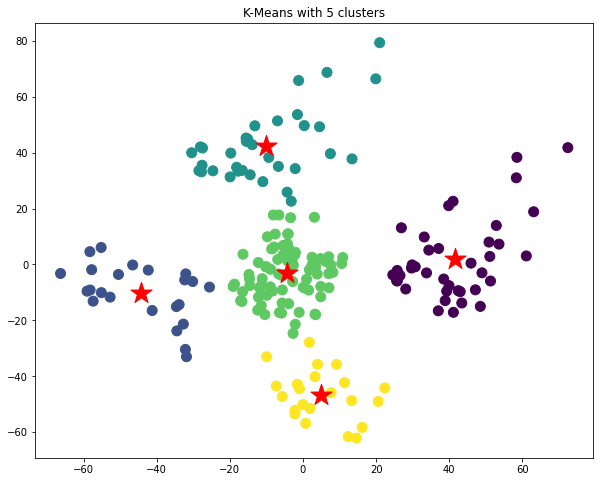

In [19]:
#Visualization of the result

plt.figure(figsize=(10, 8))

plt.title('K-Means with 5 clusters')

plt.scatter(X.P1, X.P2, c=y_means, s=100)

plt.scatter(bc[:,0], bc[:,1], color='red', marker='*', s=500)

# **Reference Source**

**Source Link**


1.   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

2.   https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

3.   https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

4.   https://www.kaggle.com/code/hasanaltunay/kmeans-clustering-with-pca/notebook#Source

5.   https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.


